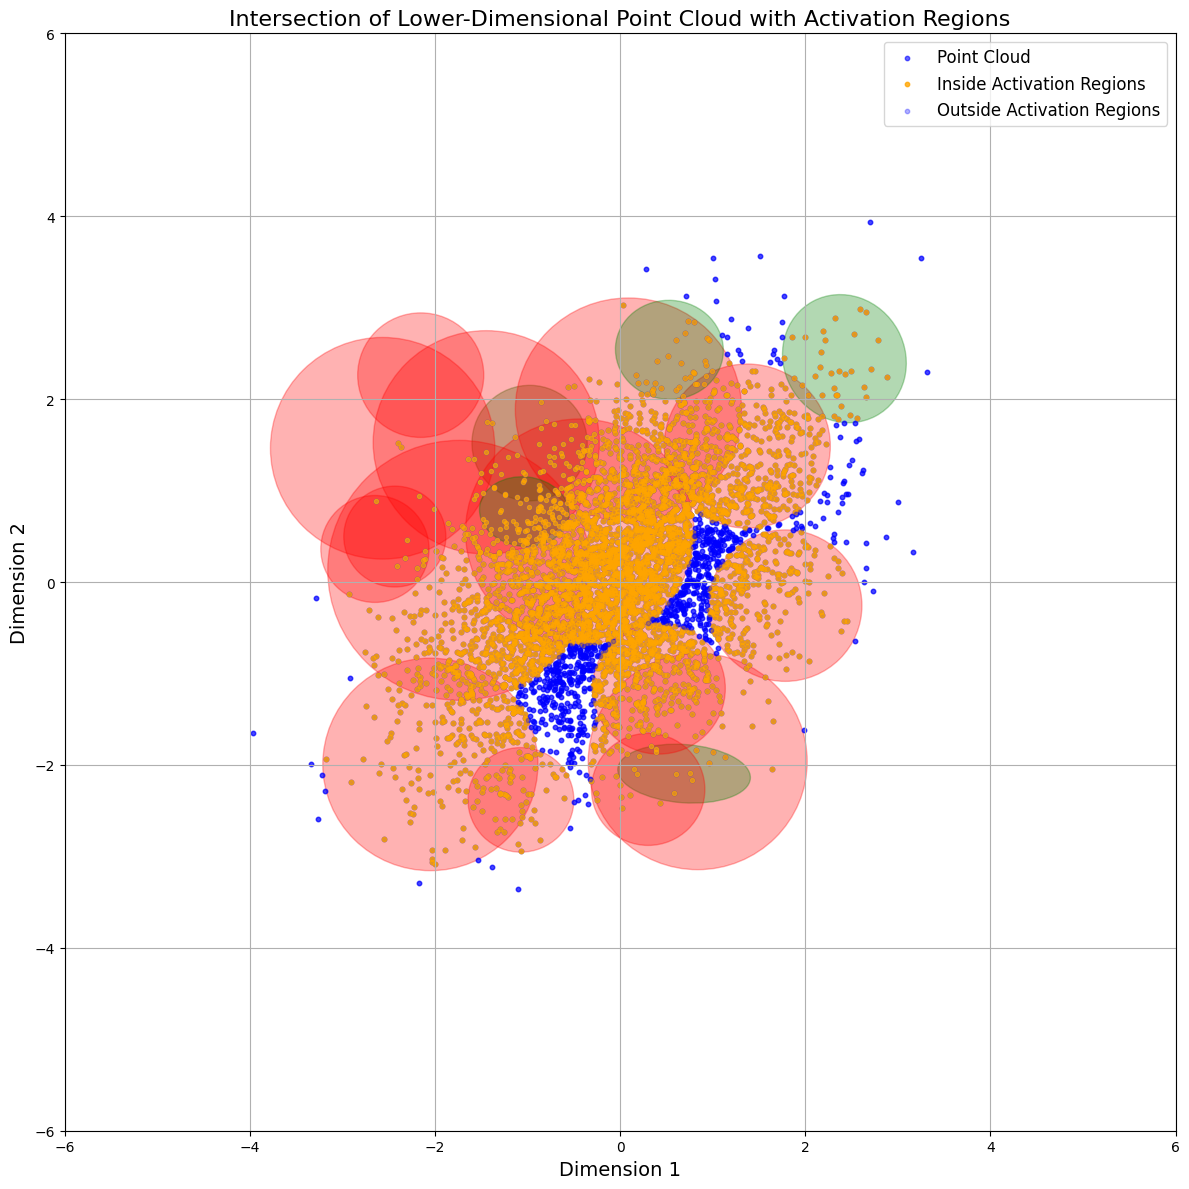

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# 1. Generate Lower-Dimensional Point Cloud
num_points = 5000
point_mean = [0, 0]
point_cov = [[1, 0.5], [0.5, 1]]  # Covariance matrix for clustering
points = np.random.multivariate_normal(point_mean, point_cov, num_points)

# 2. Define Activation Regions
num_regions = 20
activation_regions = []

for _ in range(num_regions):
    # Random center between -3 and 3
    center = np.random.uniform(-3, 3, 2)
    # Random radius between 0.5 and 1.5
    radius = np.random.uniform(0.5, 1.5)
    # Randomly decide between circle and ellipse
    if random.choice([True, False]):
        # Circle
        activation_regions.append({'type': 'circle', 'center': center, 'radius': radius})
    else:
        # Ellipse with random width and height
        width = np.random.uniform(0.5, 1.5)
        height = np.random.uniform(0.5, 1.5)
        angle = np.random.uniform(0, 360)
        activation_regions.append({'type': 'ellipse', 'center': center, 'width': width, 'height': height, 'angle': angle})

# 3. Plot the Point Cloud and Activation Regions
fig, ax = plt.subplots(figsize=(12, 12))

# Plot activation regions
for region in activation_regions:
    if region['type'] == 'circle':
        circle = Circle(region['center'], region['radius'], color='red', alpha=0.3)
        ax.add_patch(circle)
    elif region['type'] == 'ellipse':
        ellipse = Ellipse(region['center'], region['width'], region['height'], angle=region['angle'], color='green', alpha=0.3)
        ax.add_patch(ellipse)

# Plot point cloud
ax.scatter(points[:, 0], points[:, 1], s=10, color='blue', alpha=0.6, label='Point Cloud')

# 4. Highlight Intersections
# Function to check if points are inside any activation region
def is_inside(point, regions):
    for region in regions:
        if region['type'] == 'circle':
            distance = np.linalg.norm(point - region['center'])
            if distance <= region['radius']:
                return True
        elif region['type'] == 'ellipse':
            # Rotate point coordinates
            theta = np.deg2rad(region['angle'])
            rotation_matrix = np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]])
            rotated_point = rotation_matrix.dot(point - region['center'])
            # Check within ellipse
            x, y = rotated_point
            if (x / (region['width'] / 2))**2 + (y / (region['height'] / 2))**2 <= 1:
                return True
    return False

# Determine which points are inside any activation region
inside_indices = [i for i, point in enumerate(points) if is_inside(point, activation_regions)]
outside_indices = list(set(range(num_points)) - set(inside_indices))

# Plot points inside activation regions
ax.scatter(points[inside_indices, 0], points[inside_indices, 1], s=10, color='orange', alpha=0.8, label='Inside Activation Regions')

# Plot points outside activation regions
ax.scatter(points[outside_indices, 0], points[outside_indices, 1], s=10, color='blue', alpha=0.3, label='Outside Activation Regions')

# Customize the plot
ax.set_title('Intersection of Lower-Dimensional Point Cloud with Activation Regions', fontsize=16)
ax.set_xlabel('Dimension 1', fontsize=14)
ax.set_ylabel('Dimension 2', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ax.grid(True)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.tight_layout()
plt.savefig('point_cloud_activation_regions.pdf', dpi=300)
plt.show()
